# JSAnimation demo

[AMath 586, Spring Quarter 2016](http://faculty.washington.edu/rjl/classes/am586s2016/)

Illustration of how to view time dependent functions as an animation.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Use the JSAnimation package to convert a set of png files into an animation, by producing java script that loops over the different images within a web browser.  

See https://github.com/jakevdp/JSAnimation for details.  We also use some utility functions in the module `JSAnimation_frametools.py` in this directory.  

If you want to use this in a different directory, e.g. `hw5`, then you should copy over the file `JSAnimation_frametools.py` so that it is available to import.  (Or put it somewhere on your `PYTHONPATH` if you want to use it more generally.)

In [2]:
import JSAnimation_frametools as J   # J is the local name to keep things short

We first need to create a sequence of image files in png format, for different times, and save these in some directory.  Here we call the directory `_plots`.  The function `J.make_plotdir` creates this directory if it doesn't already exist and removes any old files in it (if `clobber = True`):

In [3]:
plotdir = '_plots'  # to store png files for each figure
J.make_plotdir(plotdir, clobber=True)  # ok to clobber if it already exists

Figure files for each frame will be stored in  _plots


## Create png files for each time frame

Here we just plot a function $u(x,t) = u(x - t, 0)$ that is advecting with constant velocity 1.  

As initial data we use a "wave packet", a sine wave modulated by a Gaussian.

The next cell takes a while to execute since it must create a plot and save it for each step `n`.

In [4]:
x = linspace(-2, 10, 1001)
nsteps = 21
tfinal = 10.
dt = tfinal / float(nsteps)

# wave packet initial data:
eta = lambda x: sin(20*x) * exp(-5*x**2)

# True solution of u_t + u_x = 0 with u(x,0) = eta:
utrue = lambda x,t: eta(x - t)

# Clean the _plots directory in case you re-execute this cell with different parameters:
J.make_plotdir(plotdir, clobber=True)  

for n in range(nsteps+1):
    t = n*dt
    u = utrue(x,t)
    
    clf()
    plot(x,u,'b')
    ylim(-1.2, 1.2)
    title('Wave packet at t = %8.4f' % t, fontsize=20)
    
    # Save this frame:
    J.save_frame(n, plotdir,verbose=False)
    
close('all')  # so no plot is shown when you execute this cell

Figure files for each frame will be stored in  _plots


In [5]:
ls _plots

frame00000.png  frame00006.png  frame00012.png  frame00018.png
frame00001.png  frame00007.png  frame00013.png  frame00019.png
frame00002.png  frame00008.png  frame00014.png  frame00020.png
frame00003.png  frame00009.png  frame00015.png  frame00021.png
frame00004.png  frame00010.png  frame00016.png
frame00005.png  frame00011.png  frame00017.png


You can view these individually, e.g. the initial conditions are shown in [_plots/frame00000.png](_plots/frame00000.png).

## Make an animation

These frames can now be combined into an animation:


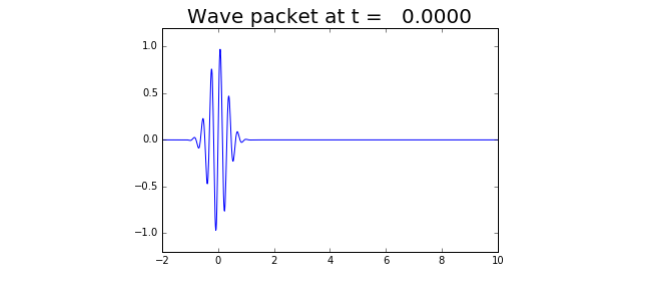
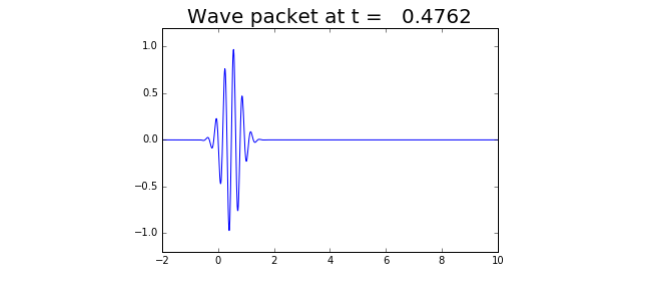
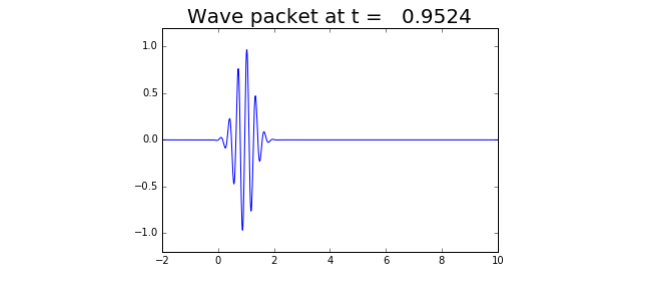
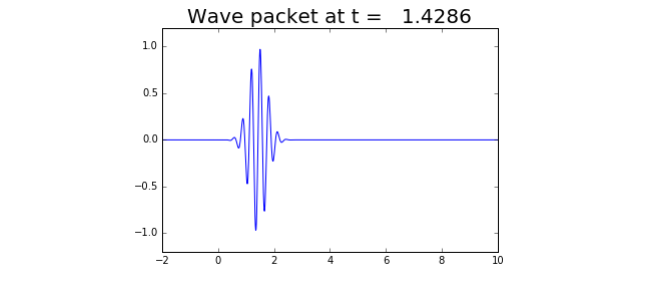
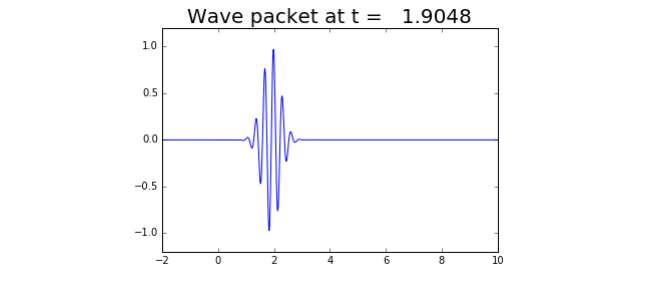
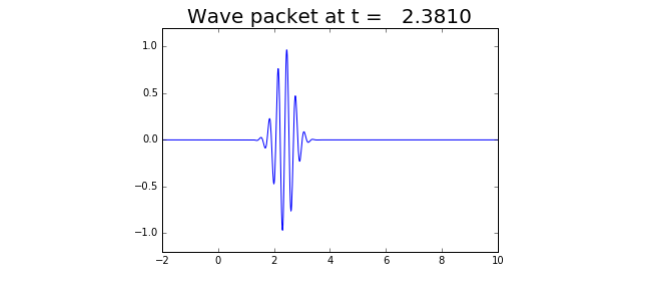
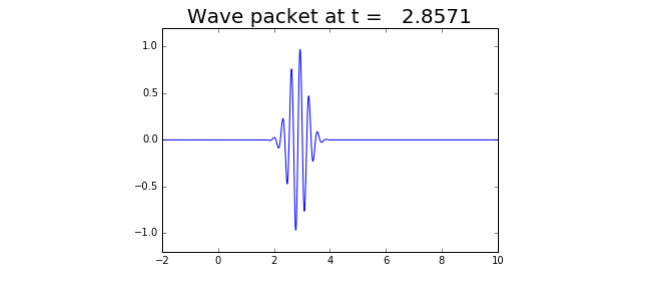
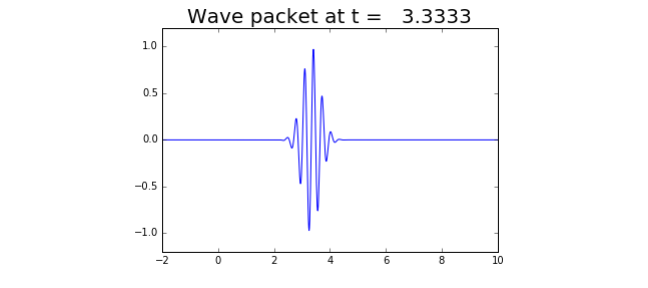
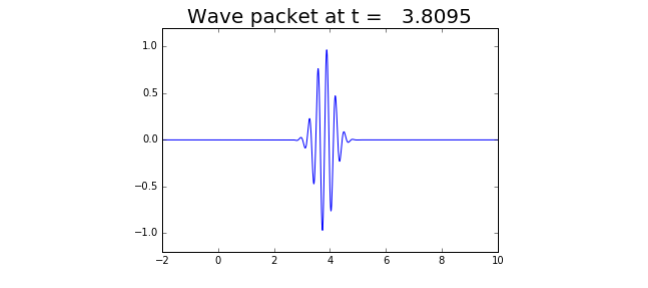
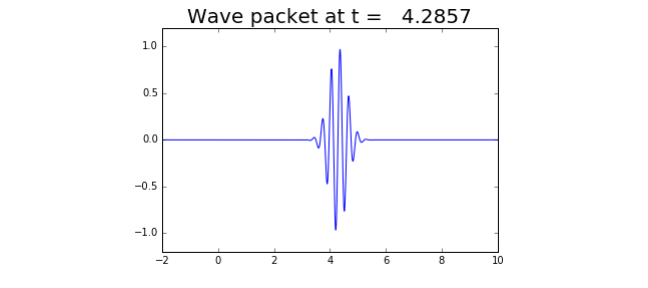
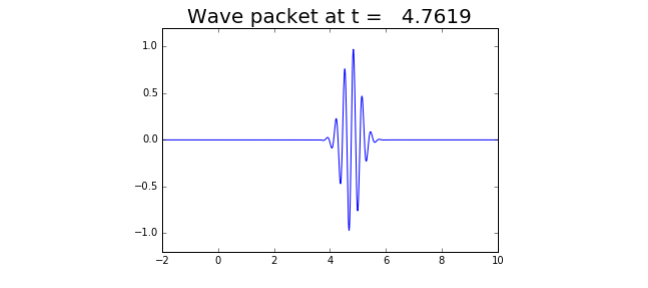
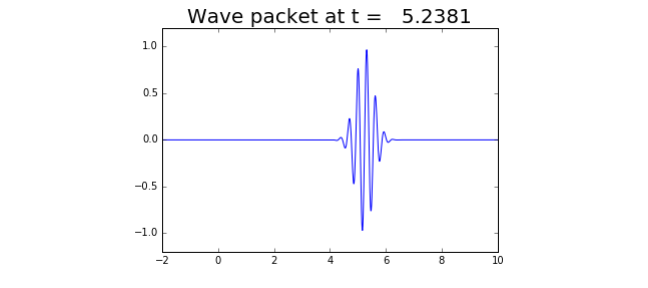
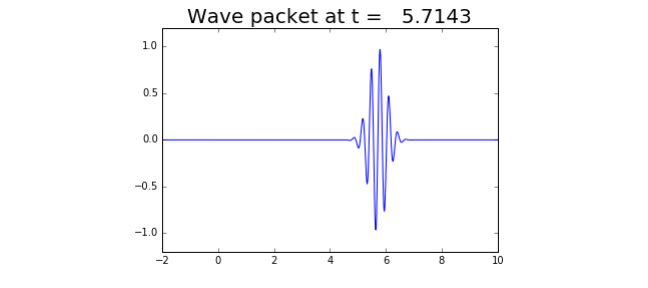
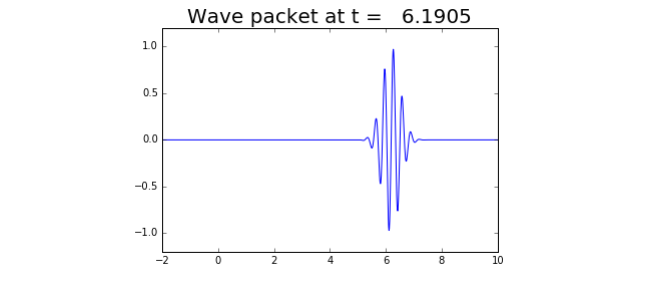
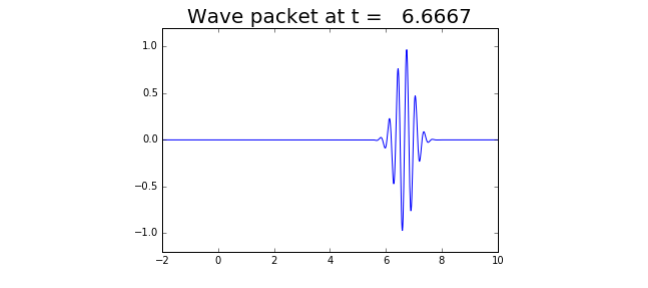
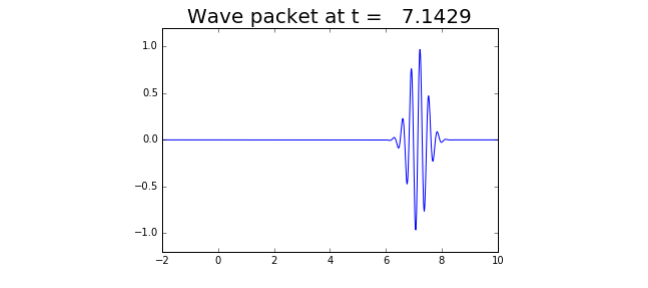
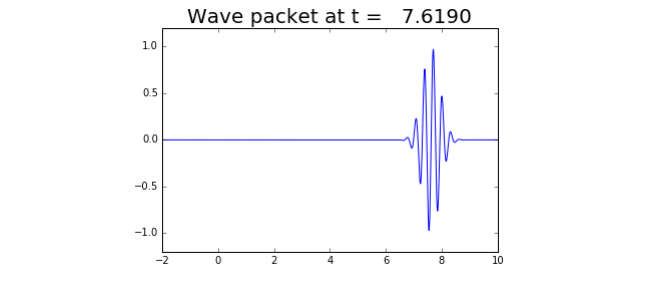
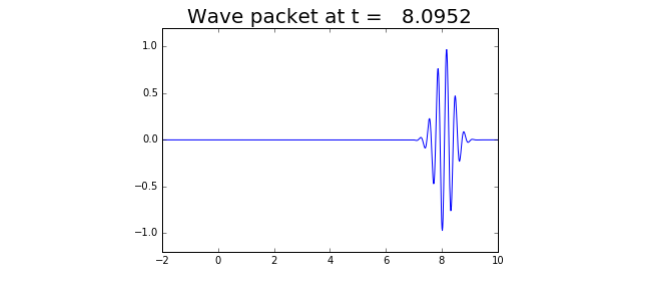
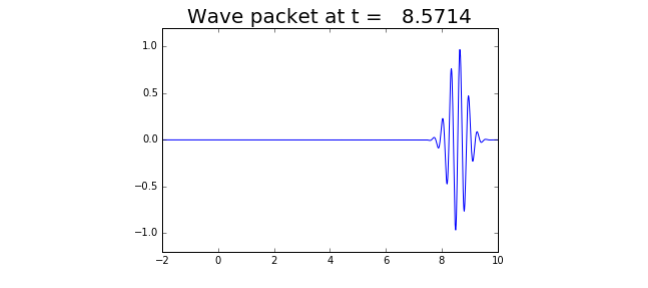
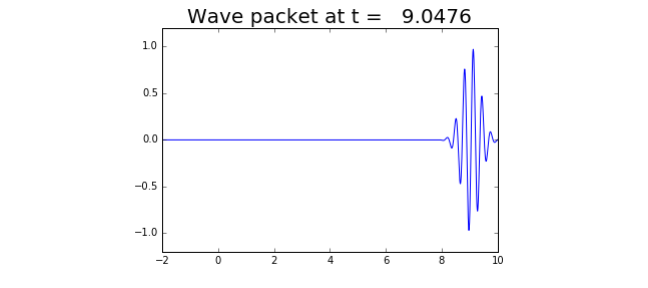
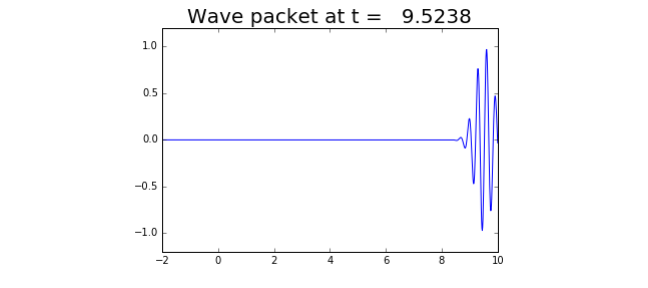
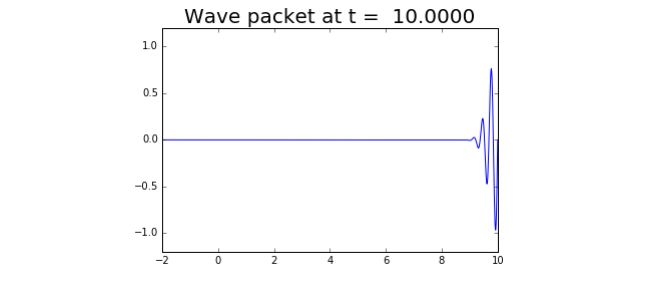

In [6]:
J.make_anim(plotdir, figsize=(9,4))

Note that the `-` and `+` buttons can be used to slow down or speed up the animation.

## Creating an html file to display on the web

You can also make a self-contained web page, e.g. to share results on a webpage.

In [7]:
anim = J.make_anim(plotdir, figsize=(9,4))
J.make_html(anim, file_name='wave_packet.html', title="Wave packet demo", \
            embed_frames = True, default_mode='once')

Created wave_packet.html


The resulting html file [wave_packet.html](wave_packet.html) can be moved elsewhere and has all the figures embedded in it.

## Clawpack gallery

JSAnimation is used to produce animations when the [Clawpack software](http://www.clawpack.org) (Conservation Laws Package) is used to solve hyperbolic PDEs.  Various examples can be viewed from the [Clawpack gallery](http://www.clawpack.org/galleries.html) if you click on an example and then on the `Plots` link and finally on one of the `JS Movies` links.  You might want to explore this gallery to get a better feel for the behavior of solutions to hyperbolic equations.